In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
mobile=tf.keras.applications.mobilenet.MobileNet()

In [15]:
def prepare_image(file):
    img_path='/Users/liubo/science_dataset/Dogandcat/train/'
    img=image.load_img(img_path+file,target_size=(224,224))
    img_array=image.img_to_array(img)
    img_array_expanded_dims=np.expand_dims(img_array,axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

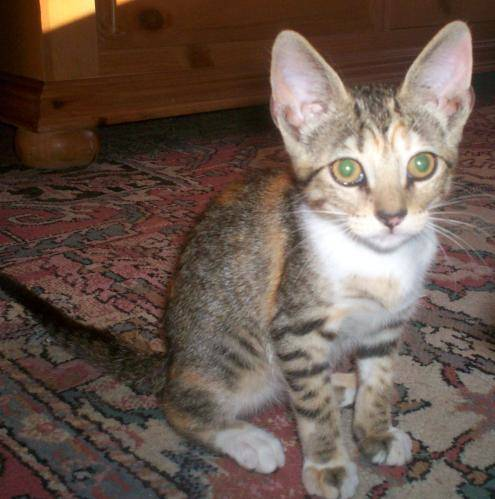

In [16]:
from IPython.display import Image
Image(filename='/Users/liubo/science_dataset/Dogandcat/train/cat.7.jpg',width=300,height=200)

In [17]:
preprocessed_image=prepare_image('cat.7.jpg')
predictions=mobile.predict(preprocessed_image)
result=imagenet_utils.decode_predictions(predictions)
result

[[('n02124075', 'Egyptian_cat', 0.9490683),
  ('n02123045', 'tabby', 0.038578946),
  ('n02123159', 'tiger_cat', 0.00852405),
  ('n02127052', 'lynx', 0.0007928533),
  ('n03598930', 'jigsaw_puzzle', 0.0004608132)]]

In [21]:
train_path='/Users/liubo/pycharmprojects/tensorflow_ml/train'
valid_path='/Users/liubo/pycharmprojects/tensorflow_ml/val'
test_path='/Users/liubo/pycharmprojects/tensorflow_ml/test'

In [23]:
train_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path,target_size=(224,224),batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path,target_size=(22,224),batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path,target_size=(224,224),batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [24]:
mobileNet=keras.applications.mobilenet.MobileNet()
mobileNet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [33]:
x=mobileNet.layers[-6].output
predictions=Dense(2,activation='softmax')(x)
model=Model(inputs=mobileNet.input,outputs=predictions)
model.summary()

Model: "functional_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [35]:
for layer in model.layers[:-5]:
    layer.trainable=False

In [36]:
model.summary()

Model: "functional_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [37]:
model.compile(Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
model.fit_generator(train_batches,steps_per_epoch=100,validation_data=valid_batches,validation_steps=20,epochs=3,verbose=2)

Epoch 1/3
100/100 - 15s - loss: 0.0781 - accuracy: 0.9740 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/3
100/100 - 15s - loss: 0.0517 - accuracy: 0.9790 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/3
100/100 - 15s - loss: 0.0260 - accuracy: 0.9940 - val_loss: nan - val_accuracy: 0.5000


In [41]:
testlabel=test_batches.classes
testlabel

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [42]:
test_batches.class_indices


{'cat': 0, 'dog': 1}